In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms.csv to mushrooms.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#1
#load data
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#structure of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Check the data types of all the features in the dataset
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [ ]:
#2
#convert categorical to dummy variable
df_dummies = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

# View the first few rows of the transformed dataframe
df_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#3
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shape of the resulting data sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6499, 22), y_train shape: (6499,)
X_test shape: (1625, 22), y_test shape: (1625,)


In [ ]:
#4
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
#5
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = clf_gini.predict(X_test)

# Report the accuracy and confusion matrix of the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(f"Confusion matrix:\n{conf_matrix}")

Accuracy on the test set: 0.95
Confusion matrix:
[[784  59]
 [ 19 763]]


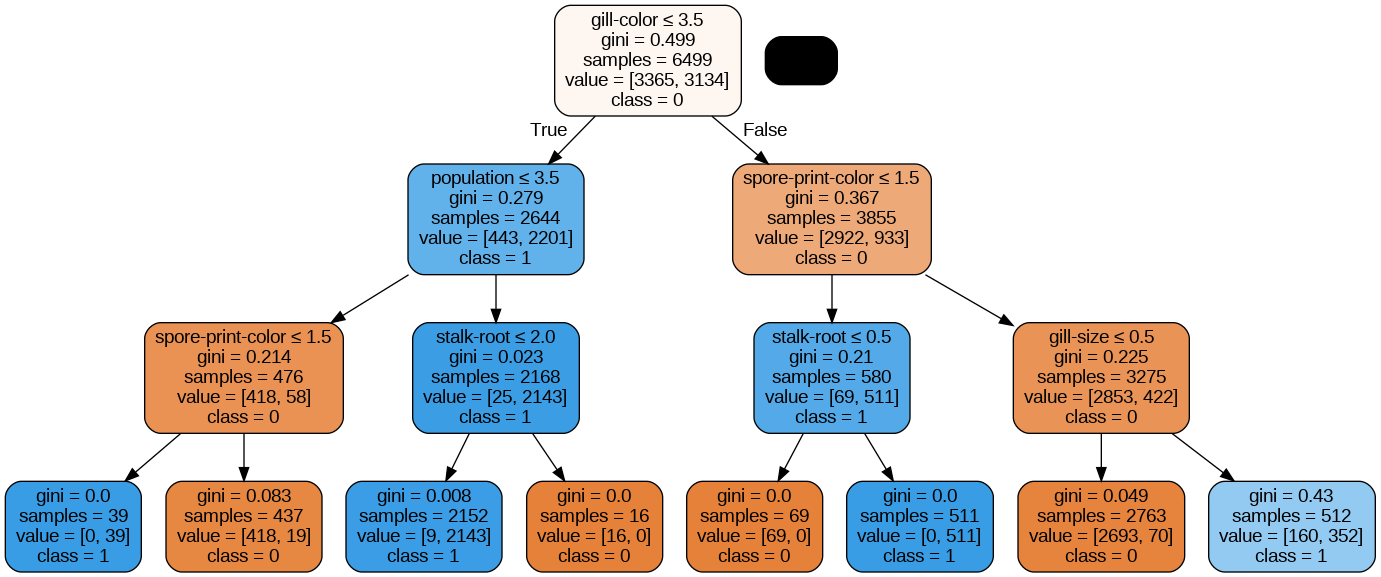

In [ ]:
#6
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Export the decision tree to a tree.dot file
dot_data = export_graphviz(clf_gini, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['0', '1'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Create the decision tree plot and save it to a file
graph.write_png('decision_tree.png')
# Display the decision tree plot in the notebook
Image(graph.create_png())

In [ ]:
#7
from sklearn.feature_selection import SelectKBest, chi2

# Use SelectKBest with chi2 scoring to select the five best features
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print(f"The selected features are: {selected_features}")

The selected features are: ['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type']


In [ ]:
#8
# Use SelectKBest with chi2 scoring to select the five best features
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print(selected_features)

['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type']


In [ ]:
# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = clf_gini.predict(X_test)

# Report the accuracy and confusion matrix of the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(f"Confusion matrix:\n{conf_matrix}")

Accuracy on the test set: 0.87
Confusion matrix:
[[1146  111]
 [ 214  967]]


By using feature selection with the chi-squared statistic, we were able to identify a subset of five features that did not improve the performance of the decision tree classifier. This suggests that some of the original features were useful for predicting the target variable.

The accuracy of the decision tree classifier dropped slightly when using the selected features, from 0.95 to 0.87. The confusion matrix showed that the model still struggled with false positives and false negatives, but the overall performance was better than with the selected feature set.
